In [1]:
import math
import pandas as pd
import numpy as np
from collections import Counter
from random import seed
import collections
import imblearn

# Machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline as imblearnPipeline
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from imblearn.under_sampling import RandomUnderSampler
#import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Model evaluation and hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from scipy import stats

# Constant features
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Feature selection methods
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(21)
path_save = '../Output/'
df = pd.read_csv(path_save + 'finaldataset_for_ML.csv', encoding='latin-1')
df2 = pd.read_csv(path_save + 'finaldataset_for_ML2.csv', encoding='latin-1')

In [4]:
df[df['Terminado'] == 1.0]

,NIF_anon,ANO_EXERCICIO,DATA_RECEPCAO,VENDAS_SERVICOS_PRESTADOS,SUBSIDIOS_EXPLORACAO,GANHOS_PERDAS_SUBSIDIARIAS,VARIA_INVENTARIOS_PRODUCAO,TRABALHOS_PROPRIA_ENTIDADE,CMVMC,FSE,...,Inventory_Turnover,Average_Collection_Period_For_Receivables,Average_Payment_Period_To_Creditors,Average_Turnover_Period_For_Inventories,Growth_Rate_Net_Sales_T1,Growth_Rate_Net_Sales_T2,Growth_Rate_Net_Sales_T3,Growth_Rate_Total_Assets_T1,Growth_Rate_Total_Assets_T2,Growth_Rate_Total_Assets_T3
0,533683393.0,2013,35:43.0,3575292.13,5899.36,0.00,9406.38,2060.62,1214731.77,888963.00,...,5.841945,37.339044,3567.980995,62.479196,NaN,NaN,NaN,NaN,NaN,NaN
1,833283384.0,2014,14:12.0,4375479.08,5363.90,7022.68,129606.23,0.00,2421525.79,847677.45,...,3.230099,133.487586,998.032883,112.999628,6.013697,NaN,NaN,5.473734,NaN,NaN
2,233783340.0,2014,42:30.0,2858042.68,31100.02,0.00,-48818.66,0.00,790521.13,997313.78,...,2.058681,26.200614,5084.804512,177.297966,14.230356,NaN,NaN,-1.363175,NaN,NaN
3,533884363.0,2013,04:47.0,3104380.30,23179.61,10.12,839.00,0.00,695060.18,745809.78,...,15.140654,96.597469,1379.176921,24.107281,NaN,NaN,NaN,NaN,NaN,NaN
4,633484313.0,2015,46:12.0,19657707.01,0.00,1261076.94,-361674.88,0.00,13328318.33,1715405.80,...,17.118323,204.857985,650.328567,21.322182,7.824969,-0.12517,NaN,1.946931,5.088581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,369984423.0,2015,51:11.0,0.00,0.00,0.00,0.00,0.00,0.00,2147.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168,169784411.0,2015,33:06.0,262848.28,0.00,0.00,222353.80,0.00,62451.10,137658.52,...,0.234933,174.427900,763.782630,1553.632628,NaN,NaN,NaN,NaN,NaN,NaN
1170,969985403.0,2015,47:34.0,0.00,0.00,0.00,0.00,0.00,0.00,42046.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,69185466.0,2015,52:26.0,264358.65,0.00,0.00,63352.06,0.00,29308.60,237625.65,...,0.248006,225.995482,589.502934,1471.739215,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
"""
Target "0": projetos encerrados / terminados
Target "1: projetos anulados
"""
def create_target_column(row):
    if(row['Terminado'] == 1.0):
        return 0
    elif(row['Anulado'] == 1.0):
        return 1
    else:
        print("Existe um registo sem target")
        return None

In [6]:
df['Target'] = df.apply(lambda x: create_target_column(x), axis=1)
df2['Target'] = df2.apply(lambda x: create_target_column(x), axis=1)

In [9]:
df.groupby(['Target'])['Target'].count()

Target
0    760
1    437
Name: Target, dtype: int64

In [11]:
df2.groupby(['Target'])['Target'].count()

Target
0    804
1    552
Name: Target, dtype: int64

### EDA

In [12]:
def display_null_counts(dataframe, columns):
    null_counts = dataframe[columns].isnull().sum()
    null_counts = null_counts[null_counts > 0]  # Filter columns with count > 0
    if len(null_counts) > 0:
        print("Null Value Counts:")
        print(null_counts)
        plt.figure(figsize=(10, 6))
        plt.bar(null_counts.index, null_counts.values)
        plt.xlabel('Financial Ratios')
        plt.ylabel('Null Value Counts')
        plt.title('Null Value Counts for Financial Ratios')
        plt.xticks(rotation=90)
        plt.show()
    else:
        print("No null values found.")

In [13]:
def create_histogram(df, columns):
    for column in columns:
        plt.hist(df[column])
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

In [14]:
financial_ratios_calc_list = [
"RESULTADO_LIQUIDO_PERIODO",
"GASTOS_DEPRECIACAO_AMORTIZA",
"PASSIVO_NC_TOTAL",
"PASSIVO_COR_TOTAL",
"ATIVO_NCOR_TOTAL",
"ATIVO_COR_TOTAL",
"VENDAS_SERVICOS_PRESTADOS",
"ATIVO_COR_CLIENTES",
"ATIVO_NCOR_FIXOS_TANGIVEIS",
"RES_ANTES_DEPRECIACAO_GASTOS",
'EBITDA',
'EBIT',
'Total_Assets',
'Total_Liabilities',
'total_assets_to_total_liabilities',
'Working capital divided by total assets',
'Gross income divided by sales',
'total debt / total assets',
'earnings before tax and interest / total asset',
'Operating cash flow current liabilities',
'Accounts_Receivables_Turnover',
'Creditors_Turnover',
'Inventory_Turnover',
'Average_Collection_Period_For_Receivables',
'Average_Payment_Period_To_Creditors',
'Average_Turnover_Period_For_Inventories',
'Growth_Rate_Net_Sales_T1',
'Growth_Rate_Net_Sales_T2',
'Growth_Rate_Net_Sales_T3',
'Growth_Rate_Total_Assets_T1',
'Growth_Rate_Total_Assets_T2',
'Growth_Rate_Total_Assets_T3'
]

Null Value Counts:
Gross income divided by sales                        6
earnings before tax and interest / total asset       2
Operating cash flow current liabilities              6
Accounts_Receivables_Turnover                       42
Creditors_Turnover                                  42
Inventory_Turnover                                  80
Average_Collection_Period_For_Receivables           42
Average_Payment_Period_To_Creditors                 50
Average_Turnover_Period_For_Inventories             89
Growth_Rate_Net_Sales_T1                           267
Growth_Rate_Net_Sales_T2                           790
Growth_Rate_Net_Sales_T3                          1004
Growth_Rate_Total_Assets_T1                        253
Growth_Rate_Total_Assets_T2                        784
Growth_Rate_Total_Assets_T3                       1002
dtype: int64


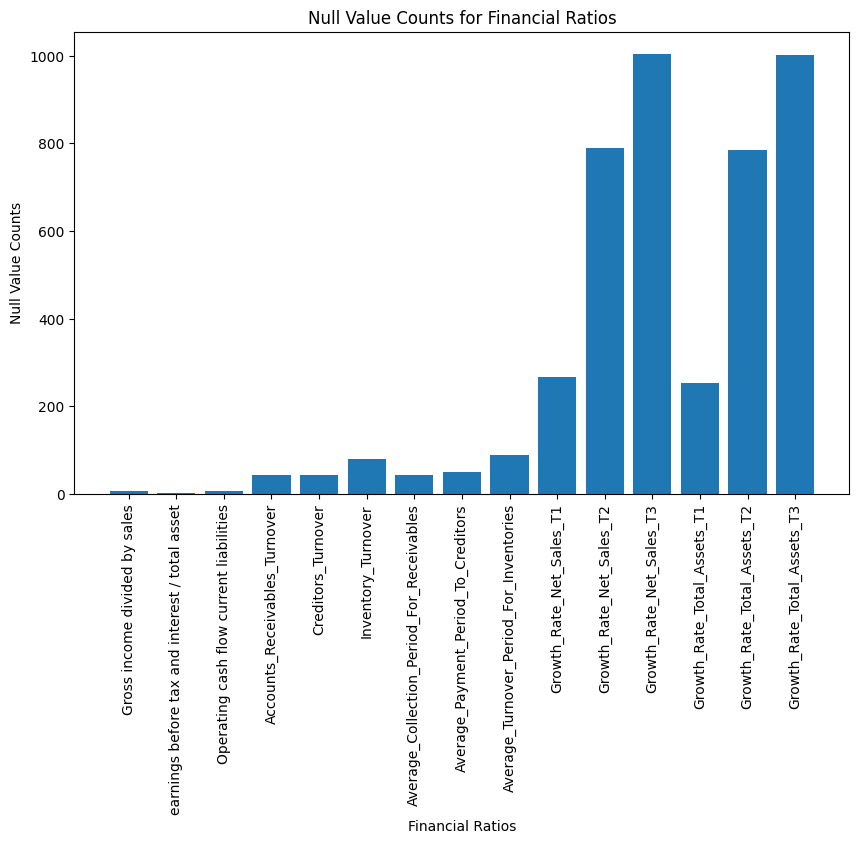

In [15]:
display_null_counts(df, financial_ratios_calc_list)

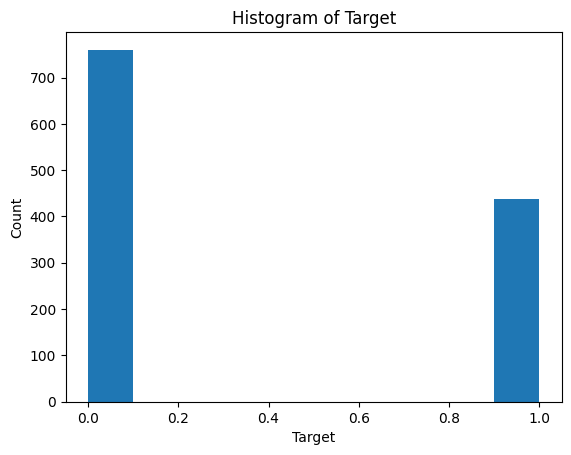

In [16]:
create_histogram(df, ['Target'])

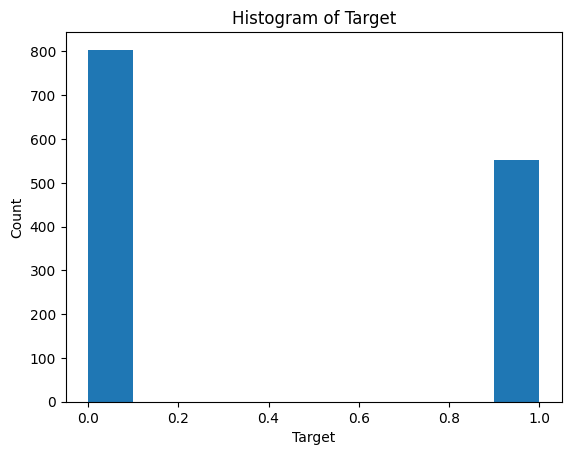

In [17]:
create_histogram(df2, ['Target'])

### Fill NA and INF

In [13]:
clean_df = df.replace(np.nan, 0.0) #Replace nulls for 0
clean_df.replace([np.inf, -np.inf], 0.0, inplace=True) #Replace infinites for 0

clean_df2 = df2.replace(np.nan, 0.0) #Replace nulls for 0
clean_df2.replace([np.inf, -np.inf], 0.0, inplace=True) #Replace infinites for 0

In [14]:
# Finding rows with NaN values
rows_with_nan = clean_df[clean_df.isna().any(axis=1)]

print(rows_with_nan)

Empty DataFrame
Columns: [NIF_anon, ANO_EXERCICIO, DATA_RECEPCAO, VENDAS_SERVICOS_PRESTADOS, SUBSIDIOS_EXPLORACAO, GANHOS_PERDAS_SUBSIDIARIAS, VARIA_INVENTARIOS_PRODUCAO, TRABALHOS_PROPRIA_ENTIDADE, CMVMC, FSE, GASTOS_PESSOAL, IMPARIDADE_INVENTARIOS, IMPARIDADE_DIVIDAS_A_RECEBER, PROVISOES, IMPARIDADE_INVENTA_N_AMORT_INVESTIMENTOS_N_DEPRECIAVEIS, OUTRAS_IMPARIDADES, AUMENTOS_RED_JUSTO_VALOR, OUTROS_REDIMENTOS_GANHOS, OUTROS_GASTOS_PERDAS, RES_ANTES_DEPRECIACAO_GASTOS, GASTOS_DEPRECIACAO_AMORTIZA, IMPARIDADE_INVEST_AMORTIZ_DEPRECIAVEIS, RESULTADO_OPERACIONAL, JUROS_RENDIME_SIMILARES_OBT, JUROS_GAST_SIMILARES_SUPORT, RES_ANTES_IMPOSTOS, IMPOSTO_RENDIMENTO_PERIODO, RESULTADO_LIQUIDO_PERIODO, ATIVO_NCOR_FIXOS_TANGIVEIS, ATIVO_NCOR_PROPRI_INVESTIMENTO, ATIVO_NCOR_GOODWILL, ATIVO_NCOR_INTANGIVEIS, ATIVO_NCOR_BIOLOGICOS, ATIVO_NCOR_PART_FINAN_EQV_PAT, ATIVO_NCOR_PART_FIN_OUTROS_MET, ATIVO_NCOR_ACCIONISTAS_SOCIOS, ATIVO_NCOR_OUTROS_ACT_FINANC, ATIVO_NCOR_IMPOSTOS_DIFERIDOS, ATIVO_NCOR_INV_FINA

In [15]:
clean_df.loc[clean_df['Target'] == 1, ['Motivo']]

,Motivo
11,Incumprimento das obrigações ou resultados con...
14,"Insolvências, PER ..."
15,0.0
18,Desistência do promotor
19,Desistência do promotor
...,...
1192,Inexecução integral da candidatura
1193,Incumprimento das obrigações ou resultados con...
1194,Outros (especificar em fundamentação)
1195,Inexecução integral da candidatura


### Constants features

In [16]:
constant_features = get_constant_features(clean_df)
#constant_features

constant_features['Var'] #Shows features that have constant values

0     resultado_das_atividades_descontinuadas
1                          IAE_CMVMC_ACT_BIOL
2                                        rank
3                        Uploads/Aplicavel_12
4                      3_IMG_EC_RS_SERSOCIAIS
                       ...                   
66                     Incentivo/Cap_Proprios
67                      Incentivo/Dispensa_Ic
68                          Paramproj/Param_1
69                             Resumo/Icep_75
70                         Impactoemp/Impacto
Name: Var, Length: 71, dtype: object

In [17]:
constant_features_list = constant_features['Var'].tolist()
constant_features_list.append('N_Proj_anon')
constant_features_list.append('CAE_SUBCLASSE')
constant_features_list.append('DATA_RECEPCAO')
constant_features_list.append('NIF_anon')
constant_features_list.append('Terminado')
constant_features_list.append('Anulado')
constant_features_list.append('Nproj_anon_x')
constant_features_list.append('Nproj_anon_y')
constant_features_list.append('ANO_EXERCICIO')
constant_features_list.append('ANO_EXERCICIO_VALIDOS')
constant_features_list.append('Parametros/Ano_Cand')
print('Existem %i colunas constantes' % len(constant_features_list))

Existem 82 colunas constantes


In [18]:
clean_df = clean_df.drop(constant_features_list, axis=1)
clean_df2 = clean_df2.drop(constant_features_list, axis=1)

In [19]:
clean_df.columns.tolist()

['VENDAS_SERVICOS_PRESTADOS',
 'SUBSIDIOS_EXPLORACAO',
 'GANHOS_PERDAS_SUBSIDIARIAS',
 'VARIA_INVENTARIOS_PRODUCAO',
 'TRABALHOS_PROPRIA_ENTIDADE',
 'CMVMC',
 'FSE',
 'GASTOS_PESSOAL',
 'IMPARIDADE_INVENTARIOS',
 'IMPARIDADE_DIVIDAS_A_RECEBER',
 'PROVISOES',
 'IMPARIDADE_INVENTA_N_AMORT_INVESTIMENTOS_N_DEPRECIAVEIS',
 'OUTRAS_IMPARIDADES',
 'AUMENTOS_RED_JUSTO_VALOR',
 'OUTROS_REDIMENTOS_GANHOS',
 'OUTROS_GASTOS_PERDAS',
 'RES_ANTES_DEPRECIACAO_GASTOS',
 'GASTOS_DEPRECIACAO_AMORTIZA',
 'RESULTADO_OPERACIONAL',
 'JUROS_RENDIME_SIMILARES_OBT',
 'JUROS_GAST_SIMILARES_SUPORT',
 'RES_ANTES_IMPOSTOS',
 'IMPOSTO_RENDIMENTO_PERIODO',
 'RESULTADO_LIQUIDO_PERIODO',
 'ATIVO_NCOR_FIXOS_TANGIVEIS',
 'ATIVO_NCOR_PROPRI_INVESTIMENTO',
 'ATIVO_NCOR_GOODWILL',
 'ATIVO_NCOR_INTANGIVEIS',
 'ATIVO_NCOR_PART_FINAN_EQV_PAT',
 'ATIVO_NCOR_PART_FIN_OUTROS_MET',
 'ATIVO_NCOR_ACCIONISTAS_SOCIOS',
 'ATIVO_NCOR_OUTROS_ACT_FINANC',
 'ATIVO_NCOR_IMPOSTOS_DIFERIDOS',
 'ATIVO_NCOR_INV_FINANC_PQ_ENTID',
 'ATIVO_NCOR_T

In [20]:
len(df.columns.tolist())

436

In [21]:
len(clean_df.columns.tolist())

354

In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Columns: 354 entries, VENDAS_SERVICOS_PRESTADOS to Target
dtypes: float64(267), int64(1), object(86)
memory usage: 3.2+ MB


In [23]:
object_columns = clean_df.select_dtypes(include='object').columns
object_columns_list = object_columns.tolist()
object_columns_list.remove("Motivo")

In [18]:
clean_df = clean_df.drop(columns=object_columns_list)
clean_df2 = clean_df2.drop(columns=object_columns_list)

NameError: name 'clean_df' is not defined

### Outliers

### Train and Split

In [25]:
projetos_encerrados = clean_df.loc[clean_df['Target'] == 0]
projetos_anulados_motivos = clean_df.loc[(clean_df['Target'] == 1) & (clean_df['Motivo'] == "Desistência do promotor")]

In [26]:
clean_df3 = pd.concat([projetos_encerrados, projetos_anulados_motivos])

In [27]:
X = clean_df.drop(columns=['Target', 'Motivo'])
y = clean_df['Target']
scaler = MinMaxScaler() #MinMaxScaler
X_scaled = pd.DataFrame(scaler.fit_transform(X.values), columns= X.columns, index=X.index)
X2 = clean_df3.drop(columns=['Target', 'Motivo'])
y2 = clean_df3['Target']
X3 = clean_df2.drop(columns=['Target', 'Motivo'])
y3 = clean_df2['Target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, train_size=0.7, test_size=0.3)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=21, train_size=0.7, test_size=0.3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=21, train_size=0.7, test_size=0.3)

In [29]:
# Finding rows with NaN values
rows_with_nan = clean_df[clean_df.isna().any(axis=1)]

print(rows_with_nan)

Empty DataFrame
Columns: [VENDAS_SERVICOS_PRESTADOS, SUBSIDIOS_EXPLORACAO, GANHOS_PERDAS_SUBSIDIARIAS, VARIA_INVENTARIOS_PRODUCAO, TRABALHOS_PROPRIA_ENTIDADE, CMVMC, FSE, GASTOS_PESSOAL, IMPARIDADE_INVENTARIOS, IMPARIDADE_DIVIDAS_A_RECEBER, PROVISOES, IMPARIDADE_INVENTA_N_AMORT_INVESTIMENTOS_N_DEPRECIAVEIS, OUTRAS_IMPARIDADES, AUMENTOS_RED_JUSTO_VALOR, OUTROS_REDIMENTOS_GANHOS, OUTROS_GASTOS_PERDAS, RES_ANTES_DEPRECIACAO_GASTOS, GASTOS_DEPRECIACAO_AMORTIZA, RESULTADO_OPERACIONAL, JUROS_RENDIME_SIMILARES_OBT, JUROS_GAST_SIMILARES_SUPORT, RES_ANTES_IMPOSTOS, IMPOSTO_RENDIMENTO_PERIODO, RESULTADO_LIQUIDO_PERIODO, ATIVO_NCOR_FIXOS_TANGIVEIS, ATIVO_NCOR_PROPRI_INVESTIMENTO, ATIVO_NCOR_GOODWILL, ATIVO_NCOR_INTANGIVEIS, ATIVO_NCOR_PART_FINAN_EQV_PAT, ATIVO_NCOR_PART_FIN_OUTROS_MET, ATIVO_NCOR_ACCIONISTAS_SOCIOS, ATIVO_NCOR_OUTROS_ACT_FINANC, ATIVO_NCOR_IMPOSTOS_DIFERIDOS, ATIVO_NCOR_INV_FINANC_PQ_ENTID, ATIVO_NCOR_TOTAL, ATIVO_COR_INVENTARIOS, ATIVO_COR_CLIENTES, ATIVO_COR_ADIANTAMENTOS_FORNE

### Feature Selection

In [30]:
# Chi2 is not used because there are features with negative values
def features_selection(X, y, classifier, n=10):
    bestfeatures = SelectKBest(score_func=classifier, k=n)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns 
    print(featureScores.nlargest(n,'Score'))  #print 10 best features
    print(X.loc[:, bestfeatures.get_support()].columns.tolist()) #Columns
    return X.columns[bestfeatures.get_support()]

In [31]:
print("Top 30 features according to f_classif")
features1 = features_selection(X, y, f_classif,30)
print("Top 30 features according to mutual_info_classif")
features2 = features_selection(X, y, mutual_info_classif,30)
print("Top 50 features according to f_classif")
features3= features_selection(X, y, f_classif,50)
print("Top 50 features according to mutual_info_classif")
features4 = features_selection(X, y, mutual_info_classif,50)

Top 30 features according to f_classif
                               Specs       Score
231             Incentivo/Tx_Major_I  109.241253
230                Incentivo/Tx_Base  107.871538
229              Incentivo/Tx_Limite  107.627585
235          Incentivo/Tx_Major_Eleg  107.627566
220                Header/Informa_Db  104.720569
232            Incentivo/Tx_Major_Ii   99.146716
228             Incentivo/Aut_Gestao   97.063833
236       Incentivo/Tx_Major_Eleg_Bd   94.232729
225               Incentivo/Dimensao   93.844063
227       Incentivo/Limite_Pt_Qualif   83.802176
226              Incentivo/Pt_Qualif   68.380715
191                  Resumo/Dimensao   55.095195
211                Dimensao/Dimensao   55.095195
17       GASTOS_DEPRECIACAO_AMORTIZA   51.486774
93          1_PESSOAL_NMP_PSE_HOMENS   45.230913
94          2_PESSOAL_NHT_PSE_HOMENS   44.818358
16      RES_ANTES_DEPRECIACAO_GASTOS   41.883851
240           Incentivo/Incentivo_Nr   37.099454
239              Incentivo/Inc

                                Specs     Score
34                   ATIVO_NCOR_TOTAL  0.064463
220                 Header/Informa_Db  0.061256
239               Incentivo/Incentivo  0.060517
231              Incentivo/Tx_Major_I  0.058487
236        Incentivo/Tx_Major_Eleg_Bd  0.056654
226               Incentivo/Pt_Qualif  0.055721
126             IAE_NUM_MED_PESS_SERV  0.054500
14           OUTROS_REDIMENTOS_GANHOS  0.053197
72     PASSIVO_COR_OUT_CONTAS_A_PAGAR  0.051115
227        Incentivo/Limite_Pt_Qualif  0.050993
263          Growth_Rate_Net_Sales_T3  0.050600
229               Incentivo/Tx_Limite  0.049817
124            IAE_CMVMC_MATER_PRIMAS  0.049455
235           Incentivo/Tx_Major_Eleg  0.049424
87    1_PESSOAL_NMP_PSETC_REMUNERADAS  0.049353
7                      GASTOS_PESSOAL  0.049288
116                        IAE_VENDAS  0.049134
88    2_PESSOAL_NHT_PSETC_REMUNERADAS  0.048945
187                   Resumo/Concelho  0.048349
82        2_PESSOAL_NHT_PESS_REMUN_SE  0

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02290
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00338
Feature: 10, Score: 0.00171
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00351
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00707
Feature: 17, Score: 0.10003
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00489
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00978
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00343
Feature: 28, Score: 0.01307
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.01741
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00755
Fe

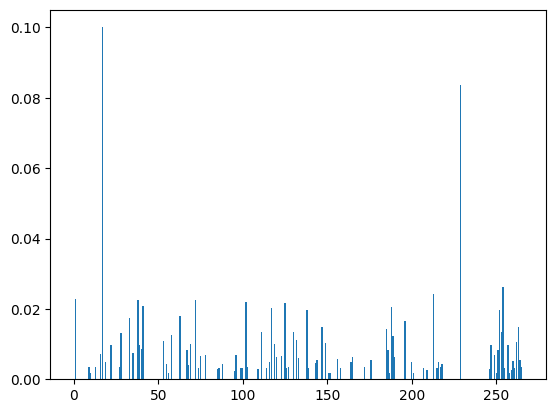

In [32]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier(random_state=21)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

df_feat_imp_DT = pd.DataFrame(enumerate(importance), columns=['FeatureIndex', 'Score'])
df_feat_imp_DT['FeatureName'] = X.columns.tolist()

features5 = [x[0] for x in df_feat_imp_DT.sort_values(by = 'Score', ascending = False, ignore_index = True).loc[:49, ['FeatureName']].values.tolist()]

Feature: 0, Score: 0.00480
Feature: 1, Score: 0.00494
Feature: 2, Score: 0.00126
Feature: 3, Score: 0.00415
Feature: 4, Score: 0.00082
Feature: 5, Score: 0.00328
Feature: 6, Score: 0.00456
Feature: 7, Score: 0.00634
Feature: 8, Score: 0.00074
Feature: 9, Score: 0.00276
Feature: 10, Score: 0.00105
Feature: 11, Score: 0.00034
Feature: 12, Score: 0.00064
Feature: 13, Score: 0.00075
Feature: 14, Score: 0.00690
Feature: 15, Score: 0.00709
Feature: 16, Score: 0.01613
Feature: 17, Score: 0.01553
Feature: 18, Score: 0.00573
Feature: 19, Score: 0.00215
Feature: 20, Score: 0.00508
Feature: 21, Score: 0.00602
Feature: 22, Score: 0.00561
Feature: 23, Score: 0.00582
Feature: 24, Score: 0.01257
Feature: 25, Score: 0.00039
Feature: 26, Score: 0.00015
Feature: 27, Score: 0.00265
Feature: 28, Score: 0.00210
Feature: 29, Score: 0.00142
Feature: 30, Score: 0.00096
Feature: 31, Score: 0.00405
Feature: 32, Score: 0.00102
Feature: 33, Score: 0.00203
Feature: 34, Score: 0.00880
Feature: 35, Score: 0.00497
Fe

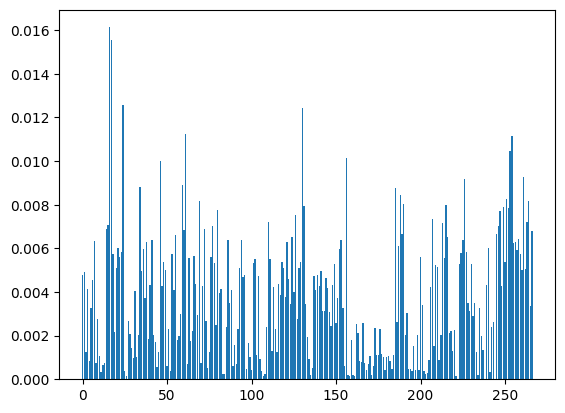

In [33]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

df_feat_imp_RF = pd.DataFrame(enumerate(importance), columns=['FeatureIndex', 'Score'])
df_feat_imp_RF['FeatureName'] = X.columns.tolist()

features6 = [x[0] for x in df_feat_imp_RF.sort_values(by = 'Score', ascending = False, ignore_index = True).loc[:49, ['FeatureName']].values.tolist()]

Feature: 0, Score: 0.00496
Feature: 1, Score: 0.00554
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00420
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00682
Feature: 6, Score: 0.00306
Feature: 7, Score: 0.00458
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00494
Feature: 10, Score: 0.01503
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00345
Feature: 15, Score: 0.00491
Feature: 16, Score: 0.02090
Feature: 17, Score: 0.02342
Feature: 18, Score: 0.00228
Feature: 19, Score: 0.00217
Feature: 20, Score: 0.00465
Feature: 21, Score: 0.00362
Feature: 22, Score: 0.00458
Feature: 23, Score: 0.00232
Feature: 24, Score: 0.01629
Feature: 25, Score: 0.00767
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00401
Feature: 28, Score: 0.01755
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00365
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.01619
Feature: 34, Score: 0.00486
Feature: 35, Score: 0.01333
Fe

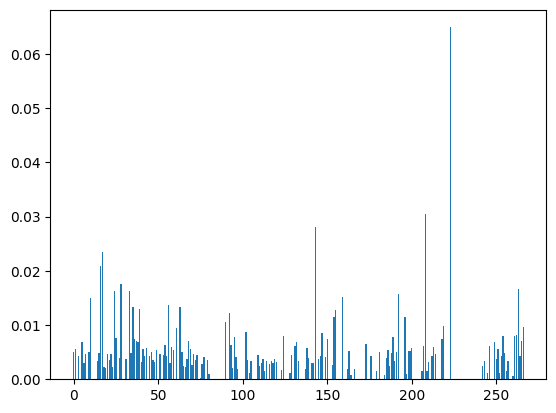

In [34]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

df_feat_imp_XGB = pd.DataFrame(enumerate(importance), columns=['FeatureIndex', 'Score'])
df_feat_imp_XGB['FeatureName'] = X.columns.tolist()

features7 = [x[0] for x in df_feat_imp_XGB.sort_values(by = 'Score', ascending = False, ignore_index = True).loc[:49, ['FeatureName']].values.tolist()]

#features7=

### Define experiments

In [35]:
features_manual = [
'EBITDA',
'EBIT',
'Total_Assets',
'Total_Liabilities',
'total_assets_to_total_liabilities',
'Working capital divided by total assets',
'Gross income divided by sales',
'total debt / total assets',
'earnings before tax and interest / total asset',
'Operating cash flow current liabilities',
'Accounts_Receivables_Turnover',
'Creditors_Turnover',
'Inventory_Turnover',
'Average_Collection_Period_For_Receivables',
'Average_Payment_Period_To_Creditors',
'Average_Turnover_Period_For_Inventories',
'Growth_Rate_Net_Sales_T1',
'Growth_Rate_Net_Sales_T2',
'Growth_Rate_Net_Sales_T3',
'Growth_Rate_Total_Assets_T1',
'Growth_Rate_Total_Assets_T2',
'Growth_Rate_Total_Assets_T3'
]

features_all = X_scaled.columns.tolist()

In [36]:
features_dict = {
    'feat1': features1,
    'feat2': features2,
    'feat3': features3,
    'feat4': features4,
    'feat5': features5,
    'feat6': features6,
    'feat7': features7,
    #'feat8': #colunas selecionadas pelo tiago
    'allFeat': features_all,
    'manualFeat': features_manual,
}

In [37]:
df_raw_feat_experience = [
['feat1',str(list(features1))],
['feat2',str(list(features2))],
['feat3',str(list(features3))],
['feat4',str(list(features4))],
['feat5',str(list(features5))],
['feat6',str(list(features6))],
['feat7',str(list(features7))],
['allFeat',str(list(features_all))],
['manualFeat',str(list(features_manual))]
]

In [38]:
df_feat_experience = pd.DataFrame(df_raw_feat_experience, columns=['Experience', 'Columns'])
display(df_feat_experience)

,Experience,Columns
0,feat1,"['RES_ANTES_DEPRECIACAO_GASTOS', 'GASTOS_DEPRE..."
1,feat2,"['GASTOS_PESSOAL', 'OUTROS_REDIMENTOS_GANHOS',..."
2,feat3,"['GASTOS_PESSOAL', 'RES_ANTES_DEPRECIACAO_GAST..."
3,feat4,"['VENDAS_SERVICOS_PRESTADOS', 'GASTOS_PESSOAL'..."
4,feat5,"['GASTOS_DEPRECIACAO_AMORTIZA', 'Incentivo/Tx_..."
5,feat6,"['RES_ANTES_DEPRECIACAO_GASTOS', 'GASTOS_DEPRE..."
6,feat7,"['Txtfinanc/Fonte', 'Promotor/Nat_Jur', '3_IMG..."
7,allFeat,"['VENDAS_SERVICOS_PRESTADOS', 'SUBSIDIOS_EXPLO..."
8,manualFeat,"['EBITDA', 'EBIT', 'Total_Assets', 'Total_Liab..."


In [39]:
#df_feat_experience.to_csv('../Clean_Output2/table_features_experience2.csv', index=False, encoding='latin-1')

In [40]:
models_list = {
    'LogisticRegression': LogisticRegression(random_state=21),
    'SupportVectorClassification': SVC(random_state=21),
    'LinearSupportVectorClassification': LinearSVC(random_state=21),
    'K-NearestNeighbors': KNeighborsClassifier(),
    'GaussianNaiveBayes': GaussianNB(),
    'Perceptron': Perceptron(random_state=21),
    'DecisionTree': DecisionTreeClassifier(random_state=21),
    'RandomForest': RandomForestClassifier(random_state=21),
    'MLPClassifier': MLPClassifier(random_state=21)
}

In [41]:
# Save models trained and types of experience
models = []
experiences= []
experiences_type = []
type_features = []
number_features = []
experience_version = [] # Criar coluna com versão da experiência

# Lists to store number of target classes (train and test)
train_class0_list = []
test_class0_list = []
train_class1_list = []
test_class1_list = []

# Lists to store values of train metrics
scores_train = []
f1_train_list = []
precision_train_list = []
recall_train_list = []
roc_auc_train_list = []

# Lists to store values of test metrics
scores = []
f1_list = []
precision_list = []
recall_list = []
roc_auc_list = []
tp_list = []
tn_list = []
fp_list = []
fn_list = []

# Scikit pipelines + Confusion Matrix
pipelines = [] # Store created pipelines
pipeline_indexes = [] # Indexes of created pipelines
cm_list = [] # Store confusion matrix of each experience
cm_indexes = [] # Indexes of each confusion matrix
#reports_index = []

index_counter = 0
experience_counter = 0

In [42]:
def execute_experience(
        experience_name,
        experience_type,
        experience_version,
        experience_version_list,
        X_train,
        y_train,
        X_test,
        y_test,
        type_features,
        models,
        experiences,
        experiences_type,
        train_class0_list,
        test_class0_list,
        train_class1_list,
        test_class1_list,
        scores_train,
        f1_train_list,
        precision_train_list,
        recall_train_list,
        roc_auc_train_list,
        scores,
        f1_list,
        precision_list,
        recall_list,
        roc_auc_list,
        tp_list,
        tn_list,
        fp_list,
        fn_list,
        pipelines,
        pipeline_indexes,
        cm_list,
        cm_indexes,
        index_counter,
        experience_counter,
        number_features,
        steps = []
):

    for key, model in models_list.items():
        final_steps = steps + [(key, model)] # Concat preprocessing if exists, p.e., StandardScaler
        print('-----------TEST for %s model------------' % (key))
        for feat in features_dict:
            pipe = Pipeline(final_steps)
            pipelines.append(pipe)
            features = features_dict[feat]
            pipe.fit(X_train[features], y_train)

            # Predict train dataset
            y_pred = pipe.predict(X_train[features])
            scores_train.append(accuracy_score(y_train, y_pred))
            f1_train_list.append(f1_score(y_train, y_pred))
            precision_train_list.append(precision_score(y_train, y_pred))
            recall_train_list.append(recall_score(y_train, y_pred))
            roc_auc_train_list.append(roc_auc_score(y_train, y_pred))

            # Predict test dataset
            y_pred = pipe.predict(X_test[features])
            scores.append(accuracy_score(y_test, y_pred))
            f1_list.append(f1_score(y_test, y_pred))
            precision_list.append(precision_score(y_test, y_pred))
            recall_list.append(recall_score(y_test, y_pred))
            roc_auc_list.append(roc_auc_score(y_test, y_pred))

            # Store number of classes
            counter_train = collections.Counter(y_train)
            counter_test = collections.Counter(y_test)
            train_class0_list.append(counter_train[0])
            test_class0_list.append(counter_test[0])
            train_class1_list.append(counter_train[1])
            test_class1_list.append(counter_test[1])

            # Store number of features
            number_features.append(len(features))

            # Generate the confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            tp_list.append(cm[1, 1])
            tn_list.append(cm[0, 0])
            fp_list.append(cm[0, 1])
            fn_list.append(cm[1, 0])
            cm_list.append(cm)
            
            # Append extra info
            pipeline_indexes.append(index_counter)
            models.append(key)
            type_features.append(feat)
            experiences.append(experience_name)
            experiences_type.append(experience_type)
            experience_version_list.append(experience_version)

            cm_indexes.append(experience_counter)
            experience_counter+=1
        
            index_counter+=1
    print("\n")
        

In [43]:
def execute_experience_kfold(
        experience_name,
        experience_type,
        experience_version,
        experience_version_list,
        X_train,
        y_train,
        X_test,
        y_test,
        type_features,
        models,
        experiences,
        experiences_type,
        train_class0_list,
        test_class0_list,
        train_class1_list,
        test_class1_list,
        scores_train,
        f1_train_list,
        precision_train_list,
        recall_train_list,
        roc_auc_train_list,
        scores,
        f1_list,
        precision_list,
        recall_list,
        roc_auc_list,
        tp_list,
        tn_list,
        fp_list,
        fn_list,
        pipelines,
        pipeline_indexes,
        cm_list,
        cm_indexes,
        index_counter,
        experience_counter,
        number_features,
        steps = []
):

    scores_type_list = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    for key, model in models_list.items():
        final_steps = steps + [(key, model)] # Concat preprocessing if exists, p.e., StandardScaler
        
        print('-----------TEST for %s model------------' % (key))
        for feat in features_dict:
            pipe = Pipeline(final_steps)
            pipelines.append(pipe)
            features = features_dict[feat]
            scores = cross_validate(pipe, X_train[features], y_train, scoring=scores_type_list, cv=cv, n_jobs=-1)

            # Predict train dataset
            scores_train.append(np.mean(scores['test_accuracy']))
            f1_train_list.append(np.mean(scores['test_f1']))
            precision_train_list.append(np.mean(scores['test_precision']))
            recall_train_list.append(np.mean(scores['test_recall']))
            roc_auc_train_list.append(np.mean(scores['test_roc_auc']))

            # Predict test dataset
            y_pred = pipe.predict(X_test[features])
            scores.append(accuracy_score(y_test, y_pred))
            f1_list.append(f1_score(y_test, y_pred))
            precision_list.append(precision_score(y_test, y_pred))
            recall_list.append(recall_score(y_test, y_pred))
            roc_auc_list.append(roc_auc_score(y_test, y_pred))

            # Store number of classes
            counter_train = collections.Counter(y_train)
            counter_test = collections.Counter(y_test)
            train_class0_list.append(counter_train[0])
            test_class0_list.append(counter_test[0])
            train_class1_list.append(counter_train[1])
            test_class1_list.append(counter_test[1])

            # Store number of features
            number_features.append(len(features))

            # Generate the confusion matrix
            #cm = confusion_matrix(y_test, y_pred)
            tp_list.append("ND")
            tn_list.append("ND")
            fp_list.append("ND")
            fn_list.append("ND")
            cm_list.append(None)

            # Append extra info
            pipeline_indexes.append(index_counter)
            models.append(key)
            type_features.append(feat)
            experiences.append(experience_name)
            experiences_type.append(experience_type)
            experience_version_list.append(experience_version)

            cm_indexes.append(experience_counter)
            experience_counter+=1
        
            index_counter+=1
    print("\n")
        

In [44]:
def execute_experience_smote(
        experience_name,
        experience_type,
        experience_version,
        experience_version_list,
        X_train,
        y_train,
        X_test,
        y_test,
        type_features,
        models,
        experiences,
        experiences_type,
        train_class0_list,
        test_class0_list,
        train_class1_list,
        test_class1_list,
        scores_train,
        f1_train_list,
        precision_train_list,
        recall_train_list,
        roc_auc_train_list,
        scores,
        f1_list,
        precision_list,
        recall_list,
        roc_auc_list,
        tp_list,
        tn_list,
        fp_list,
        fn_list,
        pipelines,
        pipeline_indexes,
        cm_list,
        cm_indexes,
        index_counter,
        experience_counter,
        number_features,
        steps = [],
):

    for key, model in models_list.items():
        final_steps = steps + [('over', SMOTE(random_state=21)), (key, model)] # Concat preprocessing if exists, p.e., StandardScaler
        print('-----------TEST for %s model------------' % (key))
        for feat in features_dict:
            pipe = imblearnPipeline(final_steps)
            pipelines.append(pipe)
            features = features_dict[feat]
            X_train_balanced, y_train_balanced = pipe['over'].fit_resample(X_train[features], y_train)
            pipe.fit(X_train_balanced, y_train_balanced)

            # Predict train dataset
            y_pred = pipe.predict(X_train_balanced)
            scores_train.append(accuracy_score(y_train_balanced, y_pred))
            f1_train_list.append(f1_score(y_train_balanced, y_pred))
            precision_train_list.append(precision_score(y_train_balanced, y_pred))
            recall_train_list.append(recall_score(y_train_balanced, y_pred))
            roc_auc_train_list.append(roc_auc_score(y_train_balanced, y_pred))

            # Predict test dataset
            y_pred = pipe.predict(X_test[features])
            scores.append(accuracy_score(y_test, y_pred))
            f1_list.append(f1_score(y_test, y_pred))
            precision_list.append(precision_score(y_test, y_pred))
            recall_list.append(recall_score(y_test, y_pred))
            roc_auc_list.append(roc_auc_score(y_test, y_pred))

            # Store number of classes
            counter_train = collections.Counter(y_train_balanced)
            counter_test = collections.Counter(y_test)
            train_class0_list.append(counter_train[0])
            test_class0_list.append(counter_test[0])
            train_class1_list.append(counter_train[1])
            test_class1_list.append(counter_test[1])

            # Store number of features
            number_features.append(len(features))

            # Generate the confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            tp_list.append(cm[1, 1])
            tn_list.append(cm[0, 0])
            fp_list.append(cm[0, 1])
            fn_list.append(cm[1, 0])
            cm_list.append(cm)
            
            # Append extra info
            pipeline_indexes.append(index_counter)
            models.append(key)
            type_features.append(feat)
            experiences.append(experience_name)
            experiences_type.append(experience_type)
            experience_version_list.append(experience_version)

            cm_indexes.append(experience_counter)
            experience_counter+=1
        
            index_counter+=1
    print("\n")
        

In [45]:
def execute_experience_smote2(
        experience_name,
        experience_type,
        experience_version,
        experience_version_list,
        X_train,
        y_train,
        X_test,
        y_test,
        type_features,
        models,
        experiences,
        experiences_type,
        train_class0_list,
        test_class0_list,
        train_class1_list,
        test_class1_list,
        scores_train,
        f1_train_list,
        precision_train_list,
        recall_train_list,
        roc_auc_train_list,
        scores,
        f1_list,
        precision_list,
        recall_list,
        roc_auc_list,
        tp_list,
        tn_list,
        fp_list,
        fn_list,
        pipelines,
        pipeline_indexes,
        cm_list,
        cm_indexes,
        index_counter,
        experience_counter,
        number_features,
        steps = []
):

    for key, model in models_list.items():
        final_steps = steps + [('over', SMOTE(random_state=21)), ('under', RandomUnderSampler(random_state=21)), (key, model)] # Concat preprocessing if exists, p.e., StandardScaler
        print('-----------TEST for %s model------------' % (key))
        for feat in features_dict:
            pipe = imblearnPipeline(final_steps)
            pipelines.append(pipe)
            features = features_dict[feat]
            X_train_balanced, y_train_balanced = pipe['over'].fit_resample(X_train[features], y_train)
            X_train_balanced, y_train_balanced = pipe['under'].fit_resample(X_train_balanced, y_train_balanced)

            pipe.fit(X_train_balanced, y_train_balanced)

            # Predict train dataset
            y_pred = pipe.predict(X_train_balanced)
            scores_train.append(accuracy_score(y_train_balanced, y_pred))
            f1_train_list.append(f1_score(y_train_balanced, y_pred))
            precision_train_list.append(precision_score(y_train_balanced, y_pred))
            recall_train_list.append(recall_score(y_train_balanced, y_pred))
            roc_auc_train_list.append(roc_auc_score(y_train_balanced, y_pred))

            # Predict test dataset
            y_pred = pipe.predict(X_test[features])
            scores.append(accuracy_score(y_test, y_pred))
            f1_list.append(f1_score(y_test, y_pred))
            precision_list.append(precision_score(y_test, y_pred))
            recall_list.append(recall_score(y_test, y_pred))
            roc_auc_list.append(roc_auc_score(y_test, y_pred))

            # Store number of classes
            counter_train = collections.Counter(y_train_balanced)
            counter_test = collections.Counter(y_test)
            train_class0_list.append(counter_train[0])
            test_class0_list.append(counter_test[0])
            train_class1_list.append(counter_train[1])
            test_class1_list.append(counter_test[1])

            # Store number of features
            number_features.append(len(features))

            # Generate the confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            tp_list.append(cm[1, 1])
            tn_list.append(cm[0, 0])
            fp_list.append(cm[0, 1])
            fn_list.append(cm[1, 0])
            cm_list.append(cm)
            
            # Append extra info
            pipeline_indexes.append(index_counter)
            models.append(key)
            type_features.append(feat)
            experiences.append(experience_name)
            experiences_type.append(experience_type)
            experience_version_list.append(experience_version)

            cm_indexes.append(experience_counter)
            experience_counter+=1
        
            index_counter+=1
    print("\n")
        

## Execute experiments

### Dummy Classifier

In [46]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.6349206349206349

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X2, y2)
dummy_clf.predict(X2)
dummy_clf.score(X2, y2)

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X3, y3)
dummy_clf.predict(X3)
dummy_clf.score(X3, y3)

### Baseline

In [47]:
execute_experience('Baseline no pre-processing (without projects filtering)',1,1,experience_version,X_train,y_train,X_test,y_test,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[])

-----------TEST for LogisticRegression model------------


-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [48]:
execute_experience('Baseline no pre-processing (with projects filtering)',1,2,experience_version,X_train2,y_train2,X_test2,y_test2,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[])

-----------TEST for LogisticRegression model------------
-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [ ]:
execute_experience('Baseline no pre-processing (without projects filtering)',1,3,experience_version,X_train3,y_train3,X_test3,y_test3,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[])

### Pre-processing (StandardScaler)

In [49]:
execute_experience('StandardScaler (without projects filtering)',2,1,experience_version,X_train,y_train,X_test,y_test,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler())])

-----------TEST for LogisticRegression model------------
-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [50]:
execute_experience('StandardScaler (with projects filtering)',2,2,experience_version,X_train2,y_train2,X_test2,y_test2,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler())])

-----------TEST for LogisticRegression model------------
-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [ ]:
execute_experience('StandardScaler (without projects filtering)',2,3,experience_version,X_train3,y_train3,X_test3,y_test3,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler())])

### Pre-processing (StandardScaler) + PCA

In [51]:
execute_experience('StandardScaler + PCA (without projects filtering)',3,1,experience_version,X_train,y_train,X_test,y_test,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler()), ('pca', PCA())])

-----------TEST for LogisticRegression model------------
-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [52]:
execute_experience('StandardScaler + PCA (with projects filtering)',3,2,experience_version,X_train2,y_train2,X_test2,y_test2,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler()), ('pca', PCA())])

-----------TEST for LogisticRegression model------------
-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [ ]:
execute_experience('StandardScaler + PCA (without projects filtering)',3,3,experience_version,X_train3,y_train3,X_test3,y_test3,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler()), ('pca', PCA())])

### Pre-processing (StandardScaler) + Smote

In [53]:
execute_experience_smote('StandardScaler + SMOTE (without projects filtering)',4,1,experience_version,X_train,y_train,X_test,y_test,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler())])

-----------TEST for LogisticRegression model------------
-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [54]:
execute_experience_smote('StandardScaler + SMOTE (with projects filtering)',4,2,experience_version,X_train2,y_train2,X_test2,y_test2,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler())])

-----------TEST for LogisticRegression model------------
-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [ ]:
execute_experience_smote('StandardScaler + SMOTE (without projects filtering)',4,3,experience_version,X_train3,y_train3,X_test3,y_test3,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler())])

### Pre-processing (StandardScaler) + Smote + RandomUnderSampling

In [55]:
execute_experience_smote2('StandardScaler + SMOTE + UnderSampling (without projects filtering)',5,1,experience_version,X_train,y_train,X_test,y_test,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler())])

-----------TEST for LogisticRegression model------------
-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [56]:
execute_experience_smote2('StandardScaler + SMOTE + UnderSampling (with projects filtering)',5,2,experience_version,X_train2,y_train2,X_test2,y_test2,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler())])

-----------TEST for LogisticRegression model------------
-----------TEST for SupportVectorClassification model------------
-----------TEST for LinearSupportVectorClassification model------------
-----------TEST for K-NearestNeighbors model------------
-----------TEST for GaussianNaiveBayes model------------
-----------TEST for Perceptron model------------
-----------TEST for DecisionTree model------------
-----------TEST for RandomForest model------------
-----------TEST for MLPClassifier model------------




In [ ]:
execute_experience_smote2('StandardScaler + SMOTE + UnderSampling (without projects filtering)',5,3,experience_version,X_train3,y_train3,X_test3,y_test3,type_features,models,experiences,experiences_type,train_class0_list,test_class0_list,train_class1_list,test_class1_list,scores_train,f1_train_list,precision_train_list,recall_train_list,roc_auc_train_list,scores,f1_list,precision_list,recall_list,roc_auc_list,tp_list,tn_list,fp_list,fn_list,pipelines,pipeline_indexes,cm_list,cm_indexes,index_counter,experience_counter,number_features,[('StandardScaler', StandardScaler())])

In [57]:
df_scores = pd.DataFrame({'Model': models,
                        'Experience': experiences,
                        'ExperienceNumber': experiences_type,
                        'ExperienceVersion': experience_version,
                        'Features_List': type_features,
                        'Nr_Features': number_features,
                        'Accuracy_Train': scores_train,
                        'F1_Train': f1_train_list,
                        'Precision_Train': precision_train_list,
                        'Recall_Train': recall_train_list,
                        'ROC_AUC_train': roc_auc_train_list,
                        'Accuracy_Test': scores,
                        'F1_Test': f1_list,
                        'Precision_Test': precision_list,
                        'Recall_Test': recall_list,
                        'ROC_AUC_Test': roc_auc_list,
                        'TP': tp_list,
                        'TN': tn_list,
                        'FP': fp_list,
                        'FN': fn_list,
                        '#Terminados(Treino)': train_class0_list,
                        '#AnuladosPosContrato(Treino)': train_class1_list,
                        '#Terminados(Teste)': test_class0_list,
                        '#AnuladosPosContrato(Teste)': test_class1_list,
                        'ConfusionMatrix_Index': cm_indexes,
                        'PipelineIndex': pipeline_indexes
                         })

df_scores.sort_values(by = 'Accuracy_Test', ascending = False, ignore_index = True)

,Model,Experience,ExperienceNumber,Features_List,Nr_Features,Accuracy_Train,F1_Train,Precision_Train,Recall_Train,ROC_AUC_train,...,TP,TN,FP,FN,#Terminados(Treino),#AnuladosPosContrato(Treino),#Terminados(Teste),#AnuladosPosContrato(Teste),ConfusionMatrix_Index,PipelineIndex
0,LogisticRegression,StandardScaler (with projects filtering),2,feat5,50,0.834553,0.426396,0.840000,0.285714,0.635394,...,19,221,3,51,536,147,224,70,4,4
1,LogisticRegression,StandardScaler + PCA (with projects filtering),3,feat5,50,0.834553,0.426396,0.840000,0.285714,0.635394,...,19,221,3,51,536,147,224,70,4,4
2,LinearSupportVectorClassification,StandardScaler + PCA (with projects filtering),3,feat5,50,0.836018,0.416667,0.888889,0.272109,0.631390,...,18,221,3,52,536,147,224,70,22,22
3,LinearSupportVectorClassification,StandardScaler (with projects filtering),2,feat5,50,0.836018,0.416667,0.888889,0.272109,0.631390,...,18,221,3,52,536,147,224,70,22,22
4,GaussianNaiveBayes,StandardScaler (with projects filtering),2,feat4,50,0.816984,0.269006,0.958333,0.156463,0.577298,...,13,224,0,57,536,147,224,70,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,LinearSupportVectorClassification,Baseline no pre-processing (with projects filt...,1,feat3,50,0.399707,0.363354,0.235412,0.795918,0.543482,...,53,63,161,17,536,147,224,70,20,20
806,GaussianNaiveBayes,StandardScaler (with projects filtering),2,manualFeat,22,0.358712,0.340361,0.218569,0.768707,0.507488,...,53,54,170,17,536,147,224,70,44,44
807,GaussianNaiveBayes,Baseline no pre-processing (with projects filt...,1,manualFeat,22,0.284041,0.357424,0.221498,0.925170,0.516690,...,65,26,198,5,536,147,224,70,44,44
808,GaussianNaiveBayes,StandardScaler + SMOTE + UnderSampling (with p...,5,manualFeat,22,0.521455,0.654545,0.512118,0.906716,0.521455,...,61,29,195,9,536,536,224,70,44,44


In [58]:
df_scores[['Model', 'Experience', 'Accuracy_Test']]

,Model,Experience,Accuracy_Test
0,LogisticRegression,Baseline no pre-processing (without projects f...,0.663889
1,LogisticRegression,Baseline no pre-processing (without projects f...,0.675000
2,LogisticRegression,Baseline no pre-processing (without projects f...,0.638889
3,LogisticRegression,Baseline no pre-processing (without projects f...,0.647222
4,LogisticRegression,Baseline no pre-processing (without projects f...,0.613889
...,...,...,...
805,MLPClassifier,StandardScaler + SMOTE + UnderSampling (with p...,0.731293
806,MLPClassifier,StandardScaler + SMOTE + UnderSampling (with p...,0.738095
807,MLPClassifier,StandardScaler + SMOTE + UnderSampling (with p...,0.724490
808,MLPClassifier,StandardScaler + SMOTE + UnderSampling (with p...,0.765306


In [ ]:
df_scores_1 = df_scores.loc[df_scores['Experience_Version'] == 1]
df_scores_2 = df_scores.loc[df_scores['Experience_Version'] == 2]
df_scores_3 = df_scores.loc[df_scores['Experience_Version'] == 3]

In [ ]:
df_scores_1.shape
df_scores_2.shape
df_scores_3.shape

In [59]:
#df_scores_not_filtered = df_scores.loc[df_scores['Experience'].str.contains("(without projects filtering)")]
#df_scores_not_filtered.drop(['ConfusionMatrix_Index', 'PipelineIndex'], axis=1).to_csv('../Clean_Output2/Results_ML_NON_FILTER.csv', index=False)

In [60]:
#df_scores_not_filtered.shape

(405, 25)

In [61]:
#df_scores_filtered = df_scores.loc[df_scores['Experience'].str.contains("(with projects filtering)")]
#df_scores_filtered.drop(['ConfusionMatrix_Index', 'PipelineIndex'], axis=1).to_csv('../Clean_Output2/Results_ML_FILTER.csv', index=False)

In [62]:
#df_scores_filtered.shape

(405, 25)

In [69]:
# Save DataFrames to separate sheets in an Excel file
with pd.ExcelWriter('../Output/Results_ML_OFICIAL.xlsx', engine='openpyxl') as writer:
    df_scores_1.drop(['ConfusionMatrix_Index', 'PipelineIndex'], axis=1).sort_values(['ExperienceNumber', 'Features_List', 'Model'], ascending=[True, True, True]).to_excel(writer, sheet_name='Original', index=False)
    df_scores_2.drop(['ConfusionMatrix_Index', 'PipelineIndex'], axis=1).sort_values(['ExperienceNumber', 'Features_List', 'Model'], ascending=[True, True, True]).to_excel(writer, sheet_name='ProjetosAnulados_Filtrados', index=False)
    df_scores_3.drop(['ConfusionMatrix_Index', 'PipelineIndex'], axis=1).sort_values(['ExperienceNumber', 'Features_List', 'Model'], ascending=[True, True, True]).to_excel(writer, sheet_name='NewDataset', index=False)

In [68]:
#df_scores_not_filtered.sort_values(['ExperienceNumber', 'Features_List', 'Model'], ascending=[True, True, True])

,Model,Experience,ExperienceNumber,Features_List,Nr_Features,Accuracy_Train,F1_Train,Precision_Train,Recall_Train,ROC_AUC_train,...,TP,TN,FP,FN,#Terminados(Treino),#AnuladosPosContrato(Treino),#Terminados(Teste),#AnuladosPosContrato(Teste),ConfusionMatrix_Index,PipelineIndex
61,DecisionTree,Baseline no pre-processing (without projects f...,1,allFeat,267,1.000000,1.000000,1.000000,1.000000,1.000000,...,70,166,53,71,541,296,219,141,61,61
43,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,allFeat,267,0.516129,0.553473,0.410802,0.847973,0.591269,...,116,72,147,25,541,296,219,141,43,43
34,K-NearestNeighbors,Baseline no pre-processing (without projects f...,1,allFeat,267,0.746714,0.600000,0.679487,0.537162,0.699265,...,31,161,58,110,541,296,219,141,34,34
25,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,allFeat,267,0.615293,0.340164,0.432292,0.280405,0.539463,...,55,171,48,86,541,296,219,141,25,25
7,LogisticRegression,Baseline no pre-processing (without projects f...,1,allFeat,267,0.702509,0.408551,0.688000,0.290541,0.609226,...,45,196,23,96,541,296,219,141,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,LogisticRegression,StandardScaler + SMOTE + UnderSampling (withou...,5,manualFeat,22,0.646026,0.643721,0.647940,0.639556,0.646026,...,84,143,76,57,541,541,219,141,8,8
728,MLPClassifier,StandardScaler + SMOTE + UnderSampling (withou...,5,manualFeat,22,0.798521,0.793169,0.814815,0.772643,0.798521,...,80,160,59,61,541,541,219,141,80,80
701,Perceptron,StandardScaler + SMOTE + UnderSampling (withou...,5,manualFeat,22,0.568392,0.656870,0.545122,0.826248,0.568392,...,110,75,144,31,541,541,219,141,53,53
719,RandomForest,StandardScaler + SMOTE + UnderSampling (withou...,5,manualFeat,22,1.000000,1.000000,1.000000,1.000000,1.000000,...,69,167,52,72,541,541,219,141,71,71
